<a href="https://colab.research.google.com/github/JinGunseon/FinanceDataAnalysis/blob/main/%EC%8B%A4%EC%8A%B51_%EC%A3%BC%EC%8B%9D_%ED%99%98%EC%9C%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_API_%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Free stock market APIs

주식 시장 데이터 API는 현재 시장에서 거래되는 금융 자산에 대한 실시간 또는 과거 데이터를 제공합니다. 이러한 API는 일반적으로 공개 주식, ETF, ETN의 가격을 제공합니다.  
이러한 데이터는 거래 전략을 수립하고 시장을 모니터링하는 기반이 되는 기술 지표를 생성하는 데 사용할 수 있습니다.

# 1. 야후 파이낸스
문서: [yfinance](https://github.com/ranaroussi/yfinance)  
tutorial: https://aroussi.com/post/python-yahoo-finance

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip uninstall --yes yfinance
!pip install yfinance
import yfinance as yf

Found existing installation: yfinance 0.2.56
Uninstalling yfinance-0.2.56:
  Successfully uninstalled yfinance-0.2.56
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.8/113.8 kB 2.5 MB/s eta 0:00:00


- 미국 주식

In [ ]:
df = yf.download('AAPL', start='2022-01-01', progress = False, multi_level_index=False)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,178.879913,179.734962,174.653874,174.771805,104487900
2022-01-04,176.609619,179.793905,176.039592,179.489238,99310400
2022-01-05,171.911835,177.071549,171.636651,176.521181,94537600
2022-01-06,169.042068,172.285320,168.688259,169.730027,96904000
2022-01-07,169.209152,171.145275,168.088758,169.916771,86709100


In [ ]:
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-04-25,209.279999,209.750000,206.199997,206.369995,38222300
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2025-04-30,212.500000,213.580002,206.669998,209.300003,51661400
2025-05-01,211.929993,212.500000,208.899994,209.009995,6656175


- 한국 주식

In [ ]:
df = yf.download('005930.KS',start='2022-01-01', progress=False, multi_level_index=False)
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-04-24,55700.0,55800.0,55200.0,55600.0,10580377
2025-04-25,55700.0,56400.0,55600.0,56400.0,12183303
2025-04-28,55800.0,55900.0,55500.0,55800.0,9341518
2025-04-29,55800.0,56500.0,55600.0,55700.0,10295518
2025-04-30,55500.0,56000.0,55300.0,55900.0,13014189


# 2. Pandas data_reader & FinanceDataReader

pandas-datareader 는 잘 구성된 시계열 데이터 수집 라이브러리로 사용이 간편하고 다양한 시계열 데이터를 수집할 수 있다는 장점이 있다. 하지만, 거래소별(KRX, NASDAQ, NYSE 등) 전체 종목 코드(ticker symbol)를 가져오는 기능이 없으며, 야후 파이낸스가 더 이상지원되지 않고(deprecated), 구글 파이낸스는 UNSTABLE_WARNING + RemoteDataError 를 낸다.

FinanceDataReader는 pandas-datareader 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다. 주요한 기능은 다음과 같다.

- 종목 코드  
거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500  


- 가격 데이터  
해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등  
국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등  
각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)  
환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율  
암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)  

In [ ]:
!pip install --upgrade pandas-datareader
!pip install --upgrade finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas_datareader as data_reader
import FinanceDataReader as fdr
import datetime

In [ ]:
start = datetime.datetime(2022,1,1)
end = datetime.datetime(2022,8,5)
start, end

(datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime(2022, 8, 5, 0, 0))

In [ ]:
stock = data_reader.DataReader('AAPL', data_source='yahoo', start=start, end=end)
stock.head()

AttributeError: 'NoneType' object has no attribute 'group'

- 미국 주식

In [ ]:
stock = fdr.DataReader('AAPL', start=start, end=end)
stock.head()

,Open,High,Low,Close,Volume,Adj Close
2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900,178.879929
2022-01-04,182.630005,182.940002,179.119995,179.699997,99310400,176.609650
2022-01-05,179.610001,180.169998,174.639999,174.919998,94537600,171.911880
2022-01-06,172.699997,175.300003,171.639999,172.000000,96904000,169.042068
2022-01-07,172.889999,174.139999,171.029999,172.169998,86709100,169.209152


- 한국 주식

In [ ]:
stock = fdr.DataReader('005930', start=start, end=end)
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205


- 원-달러 환율

In [ ]:
df = data_reader.DataReader('DEXKOUS', data_source='fred', start=start, end=end)
df.head()

,DEXKOUS
DATE,
2022-01-03,1191.39
2022-01-04,1193.77
2022-01-05,1196.38
2022-01-06,1205.02
2022-01-07,1200.78


<Axes: xlabel='DATE'>

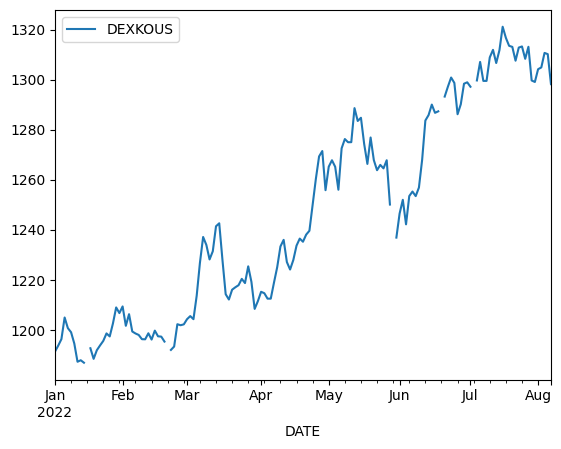

In [ ]:
df.plot()

In [ ]:
stock = fdr.DataReader('068270', start)
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,182622,184003,180782,182623,453433,0.002531
2022-01-04,180782,183542,178482,178943,715822,-0.020151
2022-01-05,178022,178022,172041,172502,1210330,-0.035995
2022-01-06,168362,171122,164682,166523,1137372,-0.034660
2022-01-07,167442,171122,166982,167903,560241,0.008287


<Axes: xlabel='Date'>

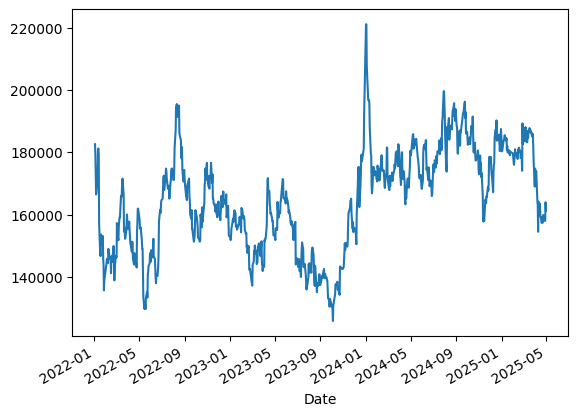

In [ ]:
stock['Close'].plot()

- DataReader